<b>Distance = Rate * Time</b>
Flaw in the model used in this Notebook: We are applying constant velocity only in the following Notebook.  No runner acceleration is measured.  


In [31]:
import numpy as np

In [32]:
time = np.arange(0,31)
time = np.arange(0,16,0.5)

In [33]:
time

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5])

In [34]:
runner1=time*40

In [35]:
runner1

array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.,
       220., 240., 260., 280., 300., 320., 340., 360., 380., 400., 420.,
       440., 460., 480., 500., 520., 540., 560., 580., 600., 620.])

In [36]:
runner2=(time*30)+40

In [37]:
runner2

array([ 40.,  55.,  70.,  85., 100., 115., 130., 145., 160., 175., 190.,
       205., 220., 235., 250., 265., 280., 295., 310., 325., 340., 355.,
       370., 385., 400., 415., 430., 445., 460., 475., 490., 505.])

Let's subtract the <b>runner2</b> array from the <b>runner1</b> array.

In [38]:
x=runner2-runner1

In [39]:
x

array([  40.,   35.,   30.,   25.,   20.,   15.,   10.,    5.,    0.,
         -5.,  -10.,  -15.,  -20.,  -25.,  -30.,  -35.,  -40.,  -45.,
        -50.,  -55.,  -60.,  -65.,  -70.,  -75.,  -80.,  -85.,  -90.,
        -95., -100., -105., -110., -115.])

Let' construct a Berkeley table with these three arrays

In [40]:
from datascience import Table

In [41]:
runner_table=Table().with_columns(['Time',time,'Runner #1',runner1,'Runner #2',runner2])

In [42]:
runner_table

Time,Runner #1,Runner #2
0,0,40
0.5,20,55
1,40,70
1.5,60,85
2,80,100
2.5,100,115
3,120,130
3.5,140,145
4,160,160
4.5,180,175


In [43]:
a = np.arange(1,16,0.5)

In [44]:
#t=Table().with_columns(['a',a,'bruce',bruce,'bolt',bolt])
runner_table=Table().with_columns(['Time',time,'Runner #1',runner1,'Runner #2',runner2])

In [45]:
runner_table

Time,Runner #1,Runner #2
0,0,40
0.5,20,55
1,40,70
1.5,60,85
2,80,100
2.5,100,115
3,120,130
3.5,140,145
4,160,160
4.5,180,175


Using the Berkeley datascience module's <b>where</b> predicates, let's determine exactly when runner1 overtakes runner2.
http://data8.org/datascience/index.html
http://data8.org/datascience/predicates.html

In [46]:
from datascience.predicates import are

In [48]:
#t.where("bolt", are.above(bruce))
#t.where('bolt', are.equal_to, t.column('bruce')) #instead of table.where('c', are.equal_to(table.column('d'))).
#catchup=runner_table.where('Runner #1', are.above, runner_table.column('Runner #2'))
catchup=runner_table.where('Runner #1', are.above_or_equal_to, runner_table.column('Runner #2'))

In [51]:
catchup.row(0)

Row(Time=4.0, Runner #1=160.0, Runner #2=160.0)

Compare <b>catchup.row(0)</b> to:
1. <b>catchup[0]</b>
1. <b>catchup[0][0]</b>

Explain the differences between these three outputs and carefully explain of the Berkeley datascience <b>Table</b> data structure and the dependent/linked <b>numpy array(s)</b> datastructure.

In [67]:
#catchup[0]
catchup[0][0]

4.0

Let's plot this data

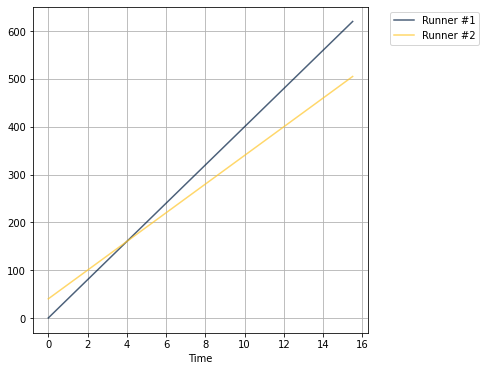

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
runner_table.plot('Time') 
plt.grid(True)

As you can see from the graph above, this model is applying only a constant velocity with ZERO reference to acceleration.